In [1]:
import keras
import numpy as np
from keras.applications import vgg16

Using TensorFlow backend.


In [2]:
vgg_model = vgg16.VGG16(weights='imagenet')

In [3]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
from PIL import Image
import cv2


In [322]:
filename = 'test25.jpg'

In [323]:
orginal = load_img(filename)
x3image=load_img(filename,target_size=(672,672))
image = load_img(filename, target_size=(224, 224))

PIL image size (224, 224)
numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


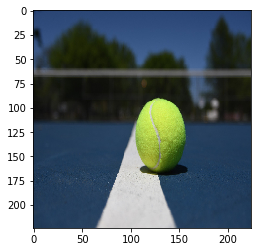

In [324]:
print('PIL image size',image.size)
numpy_image = img_to_array(image)
print('numpy array size',numpy_image.shape)
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [325]:
processed_image = vgg16.preprocess_input(image_batch.copy())
predictions = vgg_model.predict(processed_image)
label = decode_predictions(predictions)
print(label)

[[('n04409515', 'tennis_ball', 0.9759748), ('n04039381', 'racket', 0.011194249), ('n07749582', 'lemon', 0.0071303737), ('n07742313', 'Granny_Smith', 0.0018997916), ('n12267677', 'acorn', 0.00047651224)]]


In [326]:
def clean(a):
    main_str=a[0][0][1]
    main_prob=a[0][0][2]
    return([main_str,main_prob])

In [327]:
def predict(imae):
    numpy_imae = img_to_array(imae)
    imae_batch = np.expand_dims(numpy_imae, axis=0)
    processed_imae = vgg16.preprocess_input(imae_batch.copy())
    predictions = vgg_model.predict(processed_imae)
    label = decode_predictions(predictions)
    return(label)


In [328]:
main_pred=clean(predict(image))[0]
main_prob=clean(predict(image))[1]

In [329]:
pro_image=orginal.resize(((orginal.size[0]//224)*224,(orginal.size[1]//224)*224))

In [330]:
pro_a=[]
upper=0
lower=pro_image.size[1]//4
while(lower<=pro_image.size[1]):
    left=0
    right=pro_image.size[0]//6
    while(right<=pro_image.size[0]):
        pro_a.append((left,upper,right,lower))
        left+=(pro_image.size[0]//6)//3
        right+=(pro_image.size[0]//6)//3
    upper+=(pro_image.size[1]//4)//2
    lower+=(pro_image.size[1]//4)//2 

In [331]:
clean(predict(pro_image.crop(pro_a[14]).resize((224,224))))#for just checking a section of the image

['screw', 0.029422995]

In [332]:
a=0
pro_data=[]
prob_dat=[]
for i in pro_a:
    b=clean(predict(pro_image.crop(i).resize((224,224))))
    b.append(a)
    print(b," index ",a)
    a+=1
    pro_data.append(b)
    prob_dat.append(b[1])

['golf_ball', 0.03864923, 0]  index  0
['golf_ball', 0.05702245, 1]  index  1
['golf_ball', 0.16056283, 2]  index  2
['golf_ball', 0.12098026, 3]  index  3
['golf_ball', 0.07236972, 4]  index  4
['golf_ball', 0.06784235, 5]  index  5
['rapeseed', 0.03026114, 6]  index  6
['lycaenid', 0.06018392, 7]  index  7
['lycaenid', 0.07678753, 8]  index  8
['mantis', 0.06729306, 9]  index  9
['golf_ball', 0.052316487, 10]  index  10
['golf_ball', 0.039691117, 11]  index  11
['matchstick', 0.02457346, 12]  index  12
['matchstick', 0.026088633, 13]  index  13
['screw', 0.029422995, 14]  index  14
['golf_ball', 0.020796992, 15]  index  15
['tennis_ball', 0.0371068, 16]  index  16
['golf_ball', 0.05215709, 17]  index  17
['golf_ball', 0.041025635, 18]  index  18
['golf_ball', 0.030184498, 19]  index  19
['picket_fence', 0.025294289, 20]  index  20
['golf_ball', 0.028537346, 21]  index  21
['golf_ball', 0.028785456, 22]  index  22
['tennis_ball', 0.061937097, 23]  index  23
['golf_ball', 0.07760953, 2

In [333]:
z=[]
for i in range(5):
    z.append(max(prob_dat))
    prob_dat.remove(max(prob_dat))

In [334]:
pro_data_ref_num=[]
test_list=[]
for  i in pro_data:
    if(i[0]==main_pred and i[1]>=0.95*max(prob_dat) and i[1]>=min(z)):
        
        test_list.append(i[1])
        print(i)
        pro_data_ref_num.append(i[2])

['tennis_ball', 0.9996152, 56]
['tennis_ball', 0.9999062, 57]
['tennis_ball', 0.9998636, 58]
['tennis_ball', 0.99987936, 72]
['tennis_ball', 0.9999448, 74]


(592, 336, 816, 560)
(666, 336, 890, 560)
(740, 336, 964, 560)
(592, 448, 816, 672)
(740, 448, 964, 672)


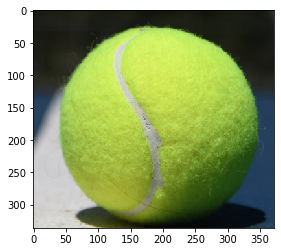

In [335]:
fle=[]
fri=[]
flo=[]
fup=[]
for i in pro_data_ref_num:
    print(pro_a[i])
    fle.append(pro_a[i][0])
    fri.append(pro_a[i][2])
    flo.append(pro_a[i][3])
    fup.append(pro_a[i][1])
plt.imshow(pro_image.crop((min(fle),min(fup),max(fri),max(flo))))

tennis_ball


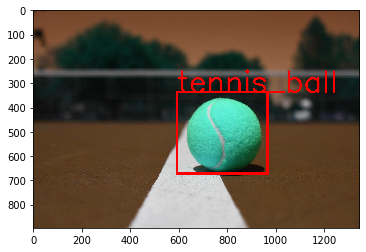

In [336]:
pro_image.save('1.jpg')
img=cv2.imread('1.jpg',cv2.IMREAD_COLOR)
cv2.rectangle(img,(min(fle),min(fup)),(max(fri),max(flo)),(255,0,0),10)
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,main_pred,(min(fle),min(fup)),font,4,(255,0,0),8,cv2.LINE_AA)
plt.imshow(np.uint8(img))
print(main_pred)